In [4]:
import numpy as np
import cv2
import os
import random
from matplotlib import pyplot as plt
import pickle

In [1]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
np.random.seed(42)

In [7]:
directory = r'/content/drive/MyDrive/newwest'
categories = ['ꯀ','ꯁ','ꯂ','ꯃ','ꯄ','ꯅ','ꯆ','ꯇ','ꯈ','ꯉ','ꯊ','ꯋ','ꯌ','ꯍ','ꯎ','ꯏ','ꯐ','ꯑ','ꯒ','ꯓ','ꯔ','ꯕ','ꯖ','ꯗ','ꯘ','ꯙ','ꯚ',
    '꯱','꯲','꯳','꯴','꯵','꯶','꯷','꯸','꯹','꯰']

In [8]:
len(categories)

37

In [9]:
augmenter = A.Compose([
    A.GaussNoise(var_limit=(0.005, 0.015), p=0.5),
    A.RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), contrast_limit=(-0.5, 0.5), p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=10, border_mode=cv2.BORDER_REFLECT_101, p=0.7),
    A.RandomResizedCrop(size=(224,224), scale=(0.8, 1.0), p=0.7),
    A.CLAHE(p=0.3),
])

# Process images
data = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for img_file in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, img_file)

        # Read and preprocess image
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img.astype(np.float32) / 255.0

        # Add original image
        data.append([img, label])

        # Add augmented versions
        for _ in range(5):
            augmented = augmenter(image=img)["image"]
            data.append([augmented, label])

# Convert to NumPy arrays
x = np.array([item[0] for item in data])
y = np.array([item[1] for item in data])  # Shape: (N,)

print("x shape:", x.shape)
print("y shape:", y.shape)

<ipython-input-9-e34f70b277d1>:2: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(0.005, 0.015), p=0.5),
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


x shape: (4884, 224, 224, 3)
y shape: (4884,)


In [10]:
x.shape

(4884, 224, 224, 3)

In [11]:
z = 4884/37
z

132.0

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D
# Load VGG16 without top layer
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in vgg_base.layers[-6:]:
    layer.trainable = True

# Add custom classification layers
x_vgg = GlobalAveragePooling2D()(vgg_base.output)
x_vgg = Dense(256, activation='relu')(x_vgg)
x_vgg = Dropout(0.5)(x_vgg)
x_vgg = Dense(128, activation='relu')(x_vgg)
output = Dense(37, activation='softmax')(x_vgg)

# Final model
model = Model(inputs=vgg_base.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
print("X shape:", x.shape)
print("Y shape:", y.shape)


X shape: (4884, 224, 224, 3)
Y shape: (4884,)


In [ ]:
model.fit(x, y,validation_split = 0.2,epochs=20,batch_size=32)

Epoch 1/20
  1/123 ━━━━━━━━━━━━━━━━━━━━ 2:43:27 80s/step - accuracy: 0.0312 - loss: 4.0239

In [ ]:
model.save('/content/drive/MyDrive/Models/Mayek123.h5')

NameError: name 'model' is not defined

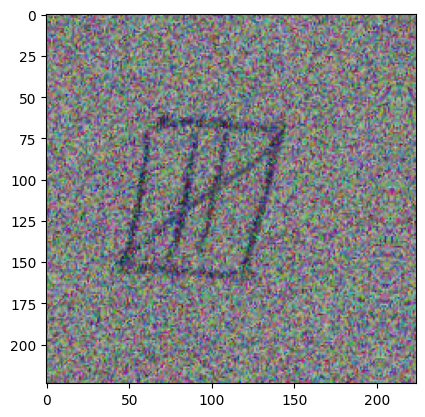

In [ ]:
id = 17
plt.imshow(x[id])

In [ ]:
from tensorflow.keras.models import load_model

# Load model from HDF5 file
model = load_model('/content/drive/MyDrive/Models/Mayek123.h5')




In [ ]:
img = cv2.imread('/content/7.jpg')
img = cv2.resize(img, (224,224))
img = img / 255.0  # Normalize if model was trained with normalization
img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 120, 120, 3)
img.shape

NameError: name 'cv2' is not defined

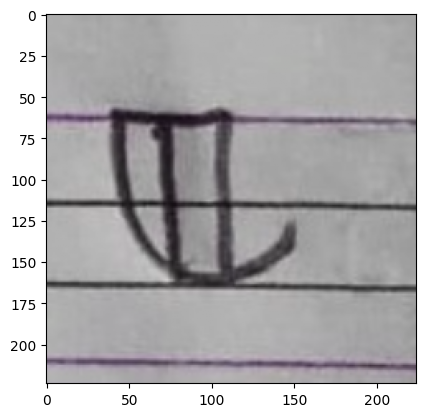

In [ ]:
plt.imshow(img[0])

In [ ]:
# Map indices to characters using a list
meetei_mayek_chars = [
    'ꯀ', 'ꯁ', 'ꯂ', 'ꯃ', 'ꯄ', 'ꯅ', 'ꯆ', 'ꯇ', 'ꯈ', 'ꯉ',
    'ꯊ', 'ꯋ', 'ꯌ', 'ꯍ', 'ꯎ', 'ꯏ', 'ꯐ', 'ꯑ', 'ꯒ', 'ꯓ',
    'ꯔ', 'ꯕ', 'ꯖ', 'ꯗ', 'ꯘ', 'ꯙ', 'ꯚ','ꯛ','ꯜ','ꯝ','ꯞ','ꯟ',
    'ꯠ','ꯡ','꯱','꯲','꯳','꯴','꯵','꯶','꯷','꯸','꯹','꯰'
]

# Get prediction
prediction = model.predict(img)
s = prediction[0]

# Print index, value (rounded), and character
for i, val in enumerate(s):
    print(f"Index: {i:2d} | Accuracy: {val:.4f} | Char: {meetei_mayek_chars[i]}")

# Get index of max accuracy
k = np.argmax(s)

# Print predicted character
print(f"\nPredicted Character: {meetei_mayek_chars[k]} \nIndex: {k}, Accuracy: {s[k]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Index:  0 | Accuracy: 0.0000 | Char: ꯀ
Index:  1 | Accuracy: 0.0000 | Char: ꯁ
Index:  2 | Accuracy: 0.0000 | Char: ꯂ
Index:  3 | Accuracy: 0.0000 | Char: ꯃ
Index:  4 | Accuracy: 0.0000 | Char: ꯄ
Index:  5 | Accuracy: 0.0000 | Char: ꯅ
Index:  6 | Accuracy: 0.0000 | Char: ꯆ
Index:  7 | Accuracy: 0.0000 | Char: ꯇ
Index:  8 | Accuracy: 0.0000 | Char: ꯈ
Index:  9 | Accuracy: 0.0000 | Char: ꯉ
Index: 10 | Accuracy: 0.0000 | Char: ꯊ
Index: 11 | Accuracy: 0.0000 | Char: ꯋ
Index: 12 | Accuracy: 0.0000 | Char: ꯌ
Index: 13 | Accuracy: 0.0000 | Char: ꯍ
Index: 14 | Accuracy: 0.0000 | Char: ꯎ
Index: 15 | Accuracy: 0.0000 | Char: ꯏ
Index: 16 | Accuracy: 0.0000 | Char: ꯐ
Index: 17 | Accuracy: 1.0000 | Char: ꯑ
Index: 18 | Accuracy: 0.0000 | Char: ꯒ
Index: 19 | Accuracy: 0.0000 | Char: ꯓ
Index: 20 | Accuracy: 0.0000 | Char: ꯔ
Index: 21 | Accuracy: 0.0000 | Char: ꯕ
Index: 22 | Accuracy: 0.0000 | Char: ꯖ
Index: 23 | Accuracy: 0.0000 | Char: ꯗ
Index: 24 | Accuracy: 0.0000